In [1]:
%matplotlib inline
from miran import *
import matplotlib as mpl
import seaborn as sns

PRINT_QUALITY = 300

# NO LINES FOR KEY DISTRIBUTIONS
sns.set_style('whitegrid', {'axes.linewidth': 0, 'axes.edgecolor': 'gray'})#, 'axes.facecolor':'snow'})
sns.set_palette("Greys", 2); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

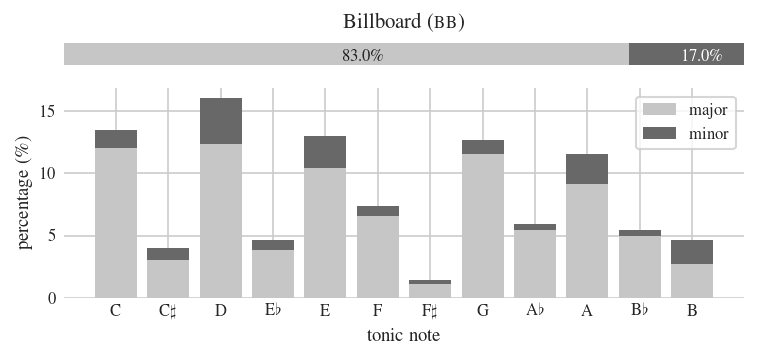

In [7]:
plot_majmin_dist('/Users/angel/Insync/datasets/billboard/keys', name='billboard', title=r'Billboard (\textsc{bb})', ext='.key', nokey=False, save=True)

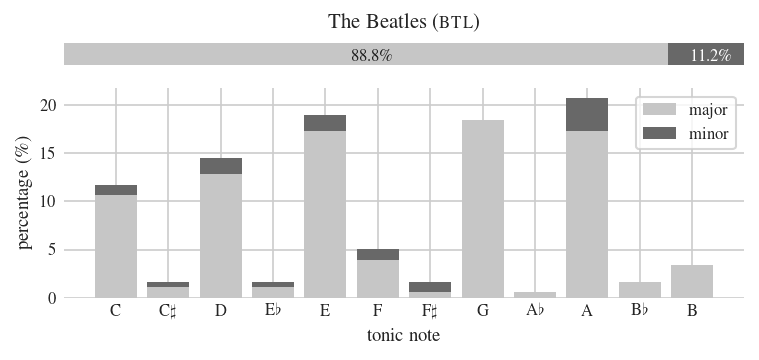

In [3]:
plot_majmin_dist('/Users/angel/Insync/datasets/beatles/keys-pollack/', name='beatles', title=r'The Beatles (\textsc{btl})', ext='.key', nokey=False, save=True)

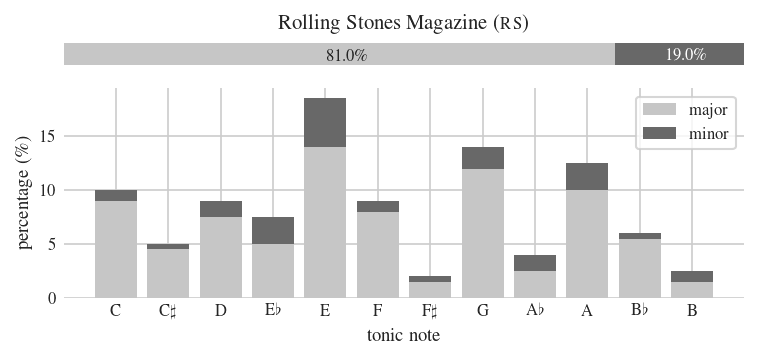

In [4]:
plot_majmin_dist('/Users/angel/Insync/datasets/RS200/keys', name='rs200', title=r'Rolling Stones Magazine (\textsc{rs})', ext='.key', nokey=False, save=True)

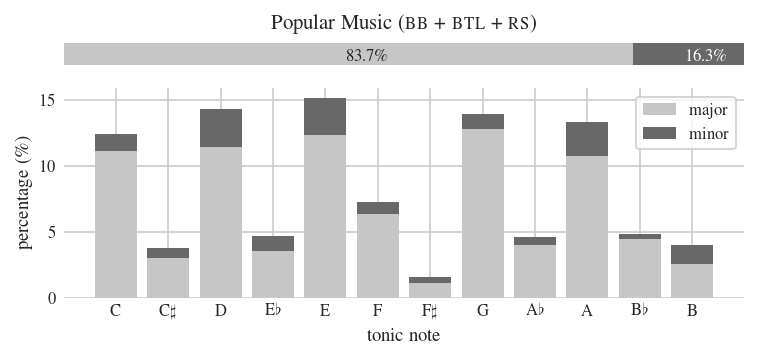

In [11]:
plot_majmin_dist('/Users/angel/Insync/Datasets/pop/', name='pop_combined', title=r'Popular Music (\textsc{bb} + \textsc{btl} + \textsc{rs})', 
                 ext='.key', nokey=False, save=True)

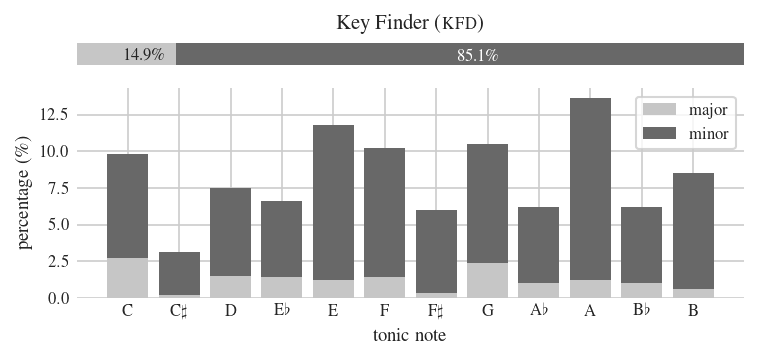

In [12]:
plot_majmin_dist('/Users/angel/Insync/datasets/keyFinder/keys', name='keyFinder', title=r'Key Finder (\textsc{kfd})', ext='.txt', nokey=False, save=True)

In [13]:
plot_majmin_dist('/Users/angel/Insync/datasets/giantsteps/keys_original/', name='giantsteps_original', 
                 title=r'GiantSteps Original (\textsc{gs\textsuperscript{k}})', ext='.key', nokey=False, save=True)

OSError: [Errno 2] No such file or directory: '/Users/angel/Insync/datasets/giantsteps/keys_original/'

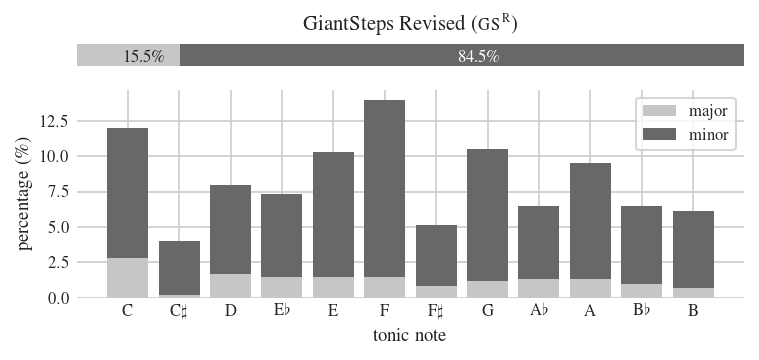

In [8]:
plot_majmin_dist('/Users/angel/Insync/datasets/giantsteps/keys_v2/', name='giantsteps_revised',
                 title=r'GiantSteps Revised (\textsc{gs\textsuperscript{r}})', ext='.txt', nokey=False, save=True)

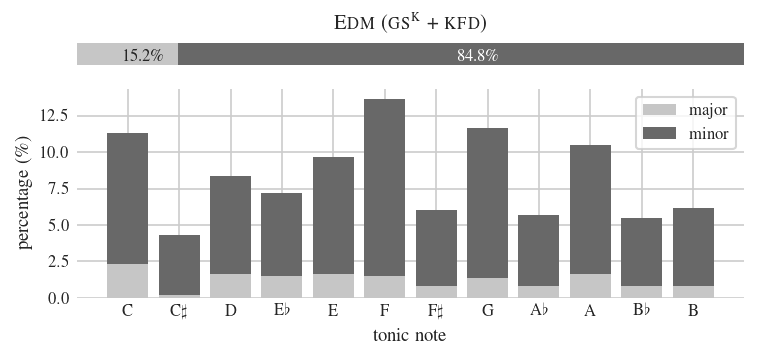

In [15]:
plot_majmin_dist('/Users/angel/Insync/Datasets/edm/', name='edm_combined',
                 title=r'\textsc{Edm} (\textsc{gs\textsuperscript{k}} + \textsc{kfd})', ext='.key', nokey=False, save=True)

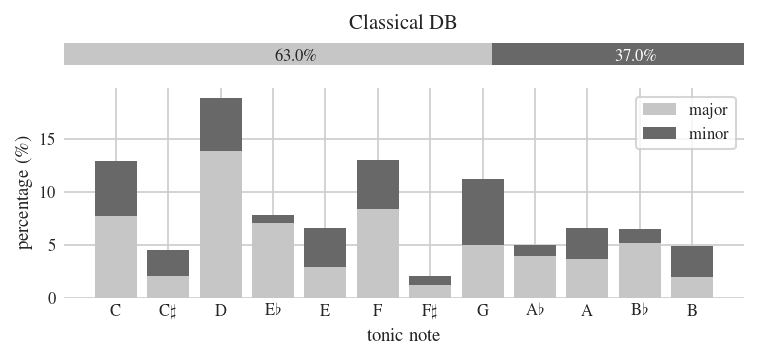

In [14]:
plot_majmin_dist('/Users/angel/Insync/datasets/classicalDB/keys', name='Classical DB', ext='.txt', nokey=False, save=True)

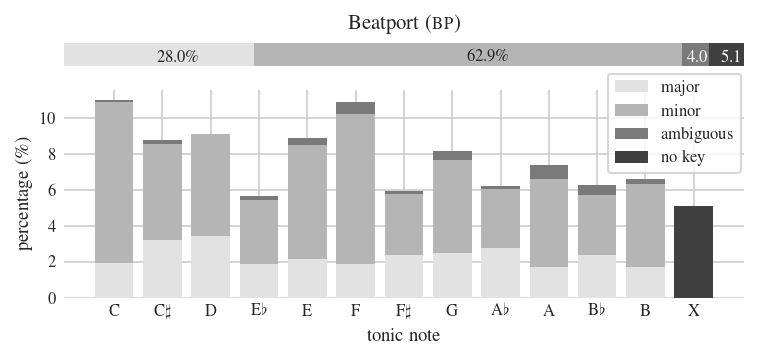

In [2]:
# THE BEATPORT DATASET PRESENTS A SLIGHTLY MORE DIFFICULT PLOTTING, GIVEN ITS MULTIPLE ANNOTATIONS.

name = r"Beatport (\textsc{bp}) "
sns.set_palette("Greys", 4)
#       C     c#   d  d#   e    f    f#   g    g#    a   a#   b
major = [28,  46, 49, 27, 31,  27,  34, 36,   40,   25,  34,   25]
minor = [128, 77, 82,  51, 91, 120,  49, 74,  47,   70,  48,  66]
other = [  2,  3,  0,   3,  6,   9,  2,   7,   2,   11,   8,   4]
no_key = 73

total_maj = np.sum(major)
total_min = np.sum(minor)
total_other = np.sum(other)
total_items = total_maj + total_min + no_key + total_other
percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)
percentage_other = np.multiply(other, percentage_factor)
percentage_no_key = np.multiply(no_key, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 2.5), dpi=150)

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1.5, 12])
ax = plt.subplot(gs[0])
a = ax.barh(0, total_maj)
b = ax.barh(0, total_min, left=total_maj)
c = ax.barh(0, total_other, left=total_min+total_maj)
d = ax.barh(0, no_key, left=total_min+total_maj+total_other)
plt.xlim((0, total_items))
plt.xticks([])
plt.yticks([])
plt.title(name, fontsize=10)

for r in a:
    pmaj = "%.1f" % (total_maj * percentage_factor)
    str_l = len(pmaj) + 1
    plt.text((total_maj * 0.5) - (str_l * 0.8), -0.25, pmaj  + '\%', fontsize=8)

for r in b:
    pmin = "%.1f" % (total_min * percentage_factor)
    str_l = len(pmin) + 1
    plt.text(total_maj + (total_min * 0.5) - (str_l * 0.8), -0.25, pmin + '\%', fontsize=8)

for r in c:
    pother = "%.1f" % (total_other * percentage_factor)
    str_l = len(pother) + 1
    plt.text(total_maj + total_min + (total_other * 0.5) - (str_l * 4.5), -0.25, pother, fontsize=8, color='white')

for r in d:
    pnk = "%.1f" % (no_key * percentage_factor)
    if no_key * percentage_factor > 3:
        str_l = len(pnk) + 1
        plt.text(total_maj + total_min + total_other + (no_key * 0.5) - (str_l * 3), -0.25, pnk, fontsize=8, color='white')

plt.subplot(gs[1])
plt.ylabel('percentage (\%)')
plt.xlabel('tonic note')
plt.xticks(range(13), (r'C', r'C$\sharp$', r'D', r'E$\flat$', r'E', r'F', r'F$\sharp$', r'G', r'A$\flat$', r'A', r'B$\flat$', r'B', r'X'))
plt.bar(range(12), percentage_major, label='major')
plt.bar(range(12), percentage_minor, bottom=percentage_major, label='minor')
plt.bar(range(12), percentage_other, bottom=np.add(percentage_major,percentage_minor), label='ambiguous')
plt.bar(12, percentage_no_key, label='no key')
plt.legend(fontsize=8, frameon=True, loc=(0.8,0.6))
plt.tight_layout()
plt.savefig(os.path.join("/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/bp_keys.png"), format="png", dpi=PRINT_QUALITY, transparent=True)

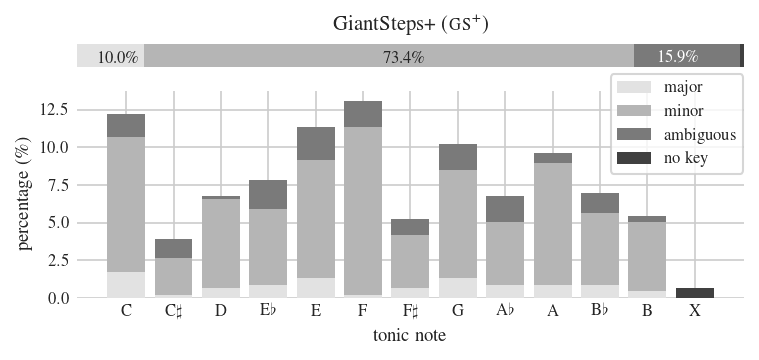

In [3]:
name = r"GiantSteps+ (\textsc{gs\textsuperscript{+}})"

major = [8,1,3,4,6,1,3,6,4,4,4,2]
minor = [41,11,27,23,36,51,16,33,19,37,22,21]
other = [7,6,1,9,10,8,5,8,8,3,6,2]
no_key = 3

total_maj = np.sum(major)
total_min = np.sum(minor)
total_other = np.sum(other)
total_items = total_maj + total_min + no_key + total_other

percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)
percentage_other = np.multiply(other, percentage_factor)
percentage_no_key = np.multiply(no_key, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 2.5), dpi=150)

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1.5, 12])
ax = plt.subplot(gs[0])
a = ax.barh(0, total_maj)
b = ax.barh(0, total_min, left=total_maj)
c = ax.barh(0, total_other, left=total_min+total_maj)
d = ax.barh(0, no_key, left=total_min+total_maj+total_other)
plt.xlim((0, total_items))
plt.xticks([])
plt.yticks([])
plt.title(name, fontsize=10)

for r in a:
    pmaj = "%.1f" % (total_maj * percentage_factor)
    str_l = len(pmaj) + 1
    plt.text((total_maj * 0.4) - (str_l * 0.8), -0.25, pmaj  + '\%', fontsize=8)

for r in b:
    pmin = "%.1f" % (total_min * percentage_factor)
    str_l = len(pmin) + 1
    plt.text(total_maj + (total_min * 0.5) - (str_l * 0.8), -0.25, pmin + '\%', fontsize=8)

for r in c:
    pother = "%.1f" % (total_other * percentage_factor)
    str_l = len(pother) + 1
    plt.text(total_maj + total_min + (total_other * 0.5) - (str_l * 4), -0.25, pother  + '\%', fontsize=8, color='white')

for r in d:
    pnk = "%.1f" % (no_key * percentage_factor)
    if no_key * percentage_factor > 3:
        str_l = len(pnk) + 1
        plt.text(total_maj + total_min + total_other + (no_key * 0.5) - (str_l * 4), -0.25, pnk, fontsize=8)

plt.subplot(gs[1])
plt.ylabel('percentage (\%)')
plt.xlabel('tonic note')
plt.xticks(range(13), (r'C', r'C$\sharp$', r'D', r'E$\flat$', r'E', r'F', r'F$\sharp$', r'G', r'A$\flat$', r'A', r'B$\flat$', r'B', r'X'))
plt.bar(range(12), percentage_major, label='major')
plt.bar(range(12), percentage_minor, bottom=percentage_major, label='minor')
plt.bar(range(12), percentage_other, bottom=np.add(percentage_major,percentage_minor), label='ambiguous')
plt.bar(12, percentage_no_key, label='no key')
plt.legend(fontsize=8, frameon=True, loc=(0.8,0.6))
plt.tight_layout()
plt.savefig(os.path.join("/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/gs+_keys.png"), format="png", dpi=PRINT_QUALITY, transparent=True)